# Data Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

# Data Cleaning Functions

In [0]:
def covert_to_lower(df,columns):
    for i in range(len(columns)):
        df[columns[i]]=  df[columns[i]].str.lower()
        

def rename_drop_cols(df):
    cols_to_delete = []
    cols_to_rename_from = []
    cols_to_rename_to = []
    for i in df.columns:
        if '_y' in i:
            cols_to_delete.append(i)
        if '_x' in i:
            cols_to_rename_from.append(i)
            cols_to_rename_to.append(i.split('_x')[0])
    for i in range(len(cols_to_delete)):
        del df[cols_to_delete[i]]
    df.rename(columns=dict(zip(cols_to_rename_from, cols_to_rename_to)), inplace=True)

def splitdata(df,col,delimeter,position,new_col):
    if new_col == 'no':
          for idx,row in em_location_df.iterrows():
            if delimeter in row[col]:
              code = row[col].split(delimeter)[position]
              df.at[idx,col] = code
    else:
      df[new_col]= df[col].apply(lambda x: x.split(delimeter)[int(position)] if x.find(delimeter)!=-1 else x )


def setdefaultmissingvalues(df) :
    for cols in df.columns:
        if df[cols].dtype == 'float64':
            df[cols] = df[cols].fillna(0.0)
        elif df[cols].dtype == 'O':
            df[cols] = df[cols].fillna('_MISSING_')
#         elif df[cols].dtype == 'datetime64[ns]':
#             df[cols] = df[cols].ffill()


def plotdata(dataframe):
    missing_data = dataframe.isnull().sum()
    df = pd.DataFrame({'name':missing_data.index, 'count':missing_data.values})
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x = 'name', y = 'count', data=df,palette="Blues")
    plt.xticks(rotation = 90)
    plt.show()

#check percentage of missing data in uom space dataset
    for col in dataframe.columns:
        pct_missing = np.mean(dataframe[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))

# Data Pre-processing

In [0]:
# drive urls
uom_space_url = '/content/drive/My Drive/MAST90106/project-data/uom-space.xlsx'
rm_category_type_url = '/content/drive/My Drive/MAST90106/project-data/rm-category-type-py-compatible.xlsx'
em_location_url = '/content/drive/My Drive/MAST90106/project-data/em-location.xlsx'
av_equipment_url = '/content/drive/My Drive/MAST90106/project-data/av-equipment.xlsx'
timetable_2020_url = '/content/drive/My Drive/MAST90106/project-data/2020-timetable-v2.xlsx'
# loading data
uom_space_df = pd.read_excel(uom_space_url)
rm_category_type_df = pd.read_excel(rm_category_type_url)
em_location_df = pd.read_excel(em_location_url)
av_equipment_df = pd.read_excel(av_equipment_url)
timetable_2020_df = pd.read_excel(timetable_2020_url)

In [0]:
covert_to_lower(uom_space_df,['Campus Code','Building Name','Room Code','Room Type Abbreviation','Department Code','Room Location Code'])
covert_to_lower(rm_category_type_df,['Room Type Abbreviation','Description','Room Type Definition'])
covert_to_lower(em_location_df,['Room Code'])
covert_to_lower(timetable_2020_df,['Name of Department','Name of Module','Description of Module','Name','Scheduled Start as day name'
                                  ,'Name of Allocated Locations','Name of Zone of Allocated Locations','Host Key of Allocated Locations',
                                  'Name of Department of Allocated Locations','Name of Type'])
covert_to_lower(av_equipment_df,['Equipment Code','Equipment Standard','Manufacturer','Equip. Status','Room Code','Campus Code','Room Type Abbreviation'])

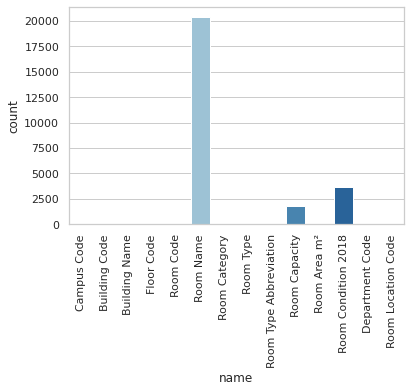

Campus Code - 0.0%
Building Code - 0.0%
Building Name - 0.0%
Floor Code - 0.0%
Room Code - 0.0%
Room Name - 92.0%
Room Category - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Room Capacity - 8.0%
Room Area m² - 0.0%
Room Condition 2018 - 16.0%
Department Code - 0.0%
Room Location Code - 0.0%


In [6]:
plotdata(uom_space_df)



In [0]:
#replace missing values for Room Name,Room condition, Room capacity, putting default value as 0 for room capacity and 'Missing' for Room condition and room name.
# Excluding the data like room name which has over 90% missing value will make the result skewed or less accurate.
# discuss with other team members on their take on this.
setdefaultmissingvalues(uom_space_df)

In [8]:
uom_space_df.dtypes

Campus Code                object
Building Code              object
Building Name              object
Floor Code                 object
Room Code                  object
Room Name                  object
Room Category               int64
Room Type                   int64
Room Type Abbreviation     object
Room Capacity             float64
Room Area m²              float64
Room Condition 2018        object
Department Code            object
Room Location Code         object
dtype: object

In [9]:
# clean room category data
rm_category_type_df.head()

,Room Category,Room Type,Room Type Abbreviation,Description,Room Type Definition
0,1,100,office - other,office - other ...,"to be used, as the last resort, for any ""offic..."
1,1,101,office academic,office - academic staff ...,a room with office furniture which provides ac...
2,1,102,office research,office - research staff ...,a room with office furniture which provides ac...
3,1,103,office grad res,office - graduate researcher ...,a room with office furniture which provides ac...
4,1,104,off-tech,office - technical/laboratory/store staff ...,a room with office furniture which provides ac...


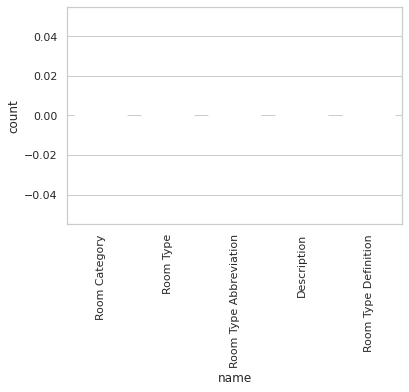

Room Category - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Description - 0.0%
Room Type Definition - 0.0%


In [10]:
plotdata(rm_category_type_df)
# since the room type data is clear, no need to clean the data. Since we need to join the data for analysis purpose. 
# We check for the missing data on the join between room category and the uom space datasets.

In [11]:
#converting the data type of Room Category and merging the data type
uom_space_df['Room Type'] = uom_space_df['Room Type'].astype('str').str.strip()
uom_space_df['Room Category'] = uom_space_df['Room Category'].astype('str').str.strip()
rm_category_type_df['Room Type']=rm_category_type_df['Room Type'].astype('str').str.strip()
rm_category_type_df['Room Category']=rm_category_type_df['Room Category'].astype('str').str.strip()
rm_category_type_df['Room Type Definition']=rm_category_type_df['Room Type Definition'].astype('str').str.strip()
joined_uom_space_df = pd.merge(uom_space_df,rm_category_type_df,on=['Room Type','Room Category'])
joined_uom_space_df.dtypes


Campus Code                  object
Building Code                object
Building Name                object
Floor Code                   object
Room Code                    object
Room Name                    object
Room Category                object
Room Type                    object
Room Type Abbreviation_x     object
Room Capacity               float64
Room Area m²                float64
Room Condition 2018          object
Department Code              object
Room Location Code           object
Room Type Abbreviation_y     object
Description                  object
Room Type Definition         object
dtype: object

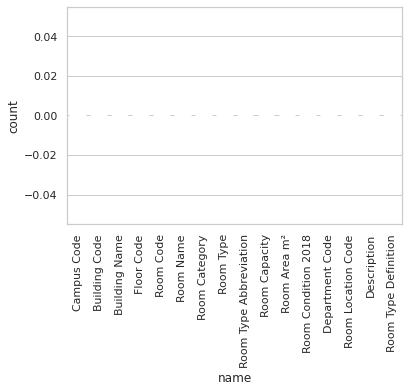

Campus Code - 0.0%
Building Code - 0.0%
Building Name - 0.0%
Floor Code - 0.0%
Room Code - 0.0%
Room Name - 0.0%
Room Category - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Room Capacity - 0.0%
Room Area m² - 0.0%
Room Condition 2018 - 0.0%
Department Code - 0.0%
Room Location Code - 0.0%
Description - 0.0%
Room Type Definition - 0.0%


In [12]:
rename_drop_cols(joined_uom_space_df)
plotdata(joined_uom_space_df)

In [13]:
em_location_df.head()

,Employee Sequential ID,Building Code,Floor Code,Room Code
0,1,102,4.0,438.01
1,2,102,0.0,g21.01
2,3,102,3.0,332.01
3,4,102,3.0,333.03
4,5,102,0.1,b08f


In [14]:
em_location_df.dtypes

Employee Sequential ID      int64
Building Code              object
Floor Code                float64
Room Code                  object
dtype: object

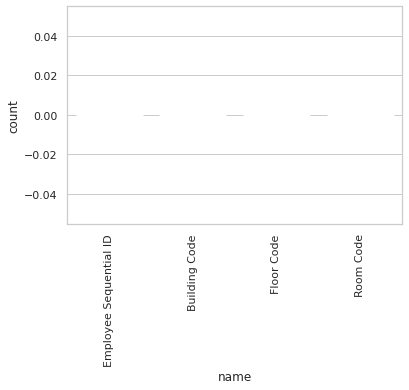

Employee Sequential ID - 0.0%
Building Code - 0.0%
Floor Code - 0.0%
Room Code - 0.0%


In [15]:
plotdata(em_location_df)

In [0]:
# merge employee and uom space data
splitdata(em_location_df,'Room Code','.',0,'no')
em_location_df['Floor Code'] = em_location_df['Floor Code'].astype('str').str.strip()
uom_space_df['Floor Code'] = uom_space_df['Floor Code'].str.strip()

em_uom_merged_df = pd.merge(uom_space_df,em_location_df,on=['Building Code','Floor Code','Room Code'],how="left")

In [17]:
em_uom_merged_df.head()


,Campus Code,Building Code,Building Name,Floor Code,Room Code,Room Name,Room Category,Room Type,Room Type Abbreviation,Room Capacity,Room Area m²,Room Condition 2018,Department Code,Room Location Code,Employee Sequential ID
0,par,101,beaurepaire centre,0,cg01,_MISSING_,6,631,circ-department,0.0,80.62,_MISSING_,8490,par;101;0;cg01,NaN
1,par,101,beaurepaire centre,0,cg02,_MISSING_,8,805,circulation,0.0,12.00,_MISSING_,unigen,par;101;0;cg02,NaN
2,par,101,beaurepaire centre,0,cg03,_MISSING_,6,631,circ-department,0.0,14.12,_MISSING_,8490,par;101;0;cg03,NaN
3,par,101,beaurepaire centre,0,cg04,_MISSING_,8,805,circulation,0.0,11.01,_MISSING_,unigen,par;101;0;cg04,NaN
4,par,101,beaurepaire centre,0,g02,_MISSING_,6,623,waiting/foyer,0.0,57.35,_MISSING_,8490,par;101;0;g02,NaN


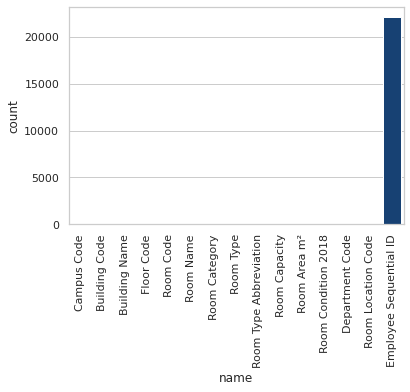

Campus Code - 0.0%
Building Code - 0.0%
Building Name - 0.0%
Floor Code - 0.0%
Room Code - 0.0%
Room Name - 0.0%
Room Category - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Room Capacity - 0.0%
Room Area m² - 0.0%
Room Condition 2018 - 0.0%
Department Code - 0.0%
Room Location Code - 0.0%
Employee Sequential ID - 100.0%


In [18]:
#can we delete the employee seq id as it will not be needed in analysing the data
plotdata(em_uom_merged_df)

In [19]:
av_equipment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Equipment Code          1964 non-null   object 
 1   Equipment Standard      1964 non-null   object 
 2   Manufacturer            1964 non-null   object 
 3   Equip. Status           1964 non-null   object 
 4   Building Code           1964 non-null   object 
 5   Floor Code              1964 non-null   float64
 6   Room Code               1964 non-null   object 
 7   Campus Code             1964 non-null   object 
 8   Room Type               1964 non-null   int64  
 9   Room Type Abbreviation  1964 non-null   object 
 10  Room Category           1964 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 168.9+ KB


In [20]:
av_equipment_df.dtypes

Equipment Code             object
Equipment Standard         object
Manufacturer               object
Equip. Status              object
Building Code              object
Floor Code                float64
Room Code                  object
Campus Code                object
Room Type                   int64
Room Type Abbreviation     object
Room Category               int64
dtype: object

In [0]:
av_equipment_df['Floor Code'] = av_equipment_df['Floor Code'].astype('str').str.strip()
av_equipment_df['Room Type Abbreviation'] = av_equipment_df['Room Type Abbreviation'].astype('str').str.strip()


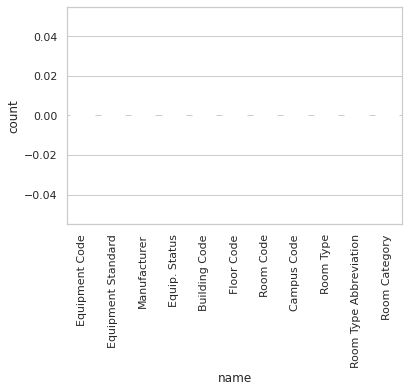

Equipment Code - 0.0%
Equipment Standard - 0.0%
Manufacturer - 0.0%
Equip. Status - 0.0%
Building Code - 0.0%
Floor Code - 0.0%
Room Code - 0.0%
Campus Code - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Room Category - 0.0%


In [22]:
plotdata(av_equipment_df)

In [0]:
#Merge equip data with uom space

# joined_uom_space_df['Room Type Definition'] = joined_uom_space_df['Room Type Definition'].astype('str').str.strip()
uom_space_df['Room Type Abbreviation'] = uom_space_df['Room Type Abbreviation'].astype('str').str.strip()
#uom + room + equi df and uom+equip
uom_equip_df = pd.merge(uom_space_df,av_equipment_df, on = ['Campus Code','Building Code','Floor Code','Room Code','Room Type Abbreviation'],how = 'left')
# uom_room_equip_df = pd.merge(joined_uom_space_df,av_equipment_df,on = ['Campus Code','Building Code','Floor Code','Room Code','Room Type Abbreviation'],how = 'left')

In [24]:
rename_drop_cols(uom_equip_df)
uom_equip_df.head()

,Campus Code,Building Code,Building Name,Floor Code,Room Code,Room Name,Room Category,Room Type,Room Type Abbreviation,Room Capacity,Room Area m²,Room Condition 2018,Department Code,Room Location Code,Equipment Code,Equipment Standard,Manufacturer,Equip. Status
0,par,101,beaurepaire centre,0,cg01,_MISSING_,6,631,circ-department,0.0,80.62,_MISSING_,8490,par;101;0;cg01,NaN,NaN,NaN,NaN
1,par,101,beaurepaire centre,0,cg02,_MISSING_,8,805,circulation,0.0,12.00,_MISSING_,unigen,par;101;0;cg02,NaN,NaN,NaN,NaN
2,par,101,beaurepaire centre,0,cg03,_MISSING_,6,631,circ-department,0.0,14.12,_MISSING_,8490,par;101;0;cg03,NaN,NaN,NaN,NaN
3,par,101,beaurepaire centre,0,cg04,_MISSING_,8,805,circulation,0.0,11.01,_MISSING_,unigen,par;101;0;cg04,NaN,NaN,NaN,NaN
4,par,101,beaurepaire centre,0,g02,_MISSING_,6,623,waiting/foyer,0.0,57.35,_MISSING_,8490,par;101;0;g02,NaN,NaN,NaN,NaN


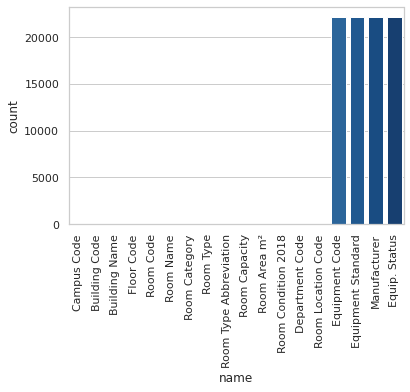

Campus Code - 0.0%
Building Code - 0.0%
Building Name - 0.0%
Floor Code - 0.0%
Room Code - 0.0%
Room Name - 0.0%
Room Category - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Room Capacity - 0.0%
Room Area m² - 0.0%
Room Condition 2018 - 0.0%
Department Code - 0.0%
Room Location Code - 0.0%
Equipment Code - 99.0%
Equipment Standard - 99.0%
Manufacturer - 99.0%
Equip. Status - 99.0%


In [25]:
plotdata(uom_equip_df)
setdefaultmissingvalues(uom_equip_df)

In [0]:
# rename_drop_cols(uom_room_equip_df)
# plotdata(uom_room_equip_df)

In [0]:
# delete useless columns from the df.
del timetable_2020_df['Name of Children']
del timetable_2020_df['Name of Allocated Locations of Children']
del timetable_2020_df['Scheduled?']
del timetable_2020_df['Booking?']

In [28]:
timetable_2020_df.head()


,Host Key of Department,Name of Department,Name of Module,Description of Module,Name,Planned Size,Scheduled Start as day name,Scheduled Start as start time,Scheduled Finish as end time,Duration as duration,Name of Allocated Locations,Name of Zone of Allocated Locations,Host Key of Allocated Locations,Name of Department of Allocated Locations,Size of Allocated Locations,Teaching week pattern as start week,Activity dates,Teaching week pattern as number of weeks,Name of Type
0,166.0,arts - social & politic sci,soci30013/u/1/sm1,survey design and analysis,soci30013/u/1/sm1/s01/02,24.0,friday,09:00:00,12:00:00,03:00:00,par-john medley-wg09 (ssps research hub),pr - professors walk,191-wg09,arts - social & politic sci,24.0,10.0,2020-03-06,12.0,seminar
1,166.0,arts - social & politic sci,soci30013/u/1/sm1,survey design and analysis,soci30013/u/1/sm1/s01/02,24.0,friday,09:00:00,12:00:00,03:00:00,par-john medley-wg09 (ssps research hub),pr - professors walk,191-wg09,arts - social & politic sci,24.0,10.0,2020-03-13,12.0,seminar
2,166.0,arts - social & politic sci,soci30013/u/1/sm1,survey design and analysis,soci30013/u/1/sm1/s01/02,24.0,friday,09:00:00,12:00:00,03:00:00,par-john medley-wg09 (ssps research hub),pr - professors walk,191-wg09,arts - social & politic sci,24.0,10.0,2020-03-20,12.0,seminar
3,166.0,arts - social & politic sci,soci30013/u/1/sm1,survey design and analysis,soci30013/u/1/sm1/s01/02,24.0,friday,09:00:00,12:00:00,03:00:00,par-john medley-wg09 (ssps research hub),pr - professors walk,191-wg09,arts - social & politic sci,24.0,10.0,2020-03-27,12.0,seminar
4,166.0,arts - social & politic sci,soci30013/u/1/sm1,survey design and analysis,soci30013/u/1/sm1/s01/02,24.0,friday,09:00:00,12:00:00,03:00:00,par-john medley-wg09 (ssps research hub),pr - professors walk,191-wg09,arts - social & politic sci,24.0,10.0,2020-04-03,12.0,seminar


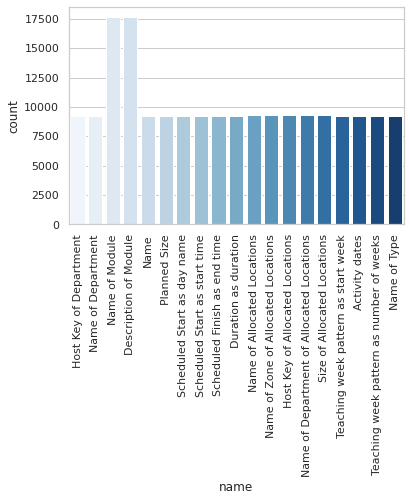

Host Key of Department - 7.0%
Name of Department - 7.0%
Name of Module - 13.0%
Description of Module - 13.0%
Name - 7.0%
Planned Size - 7.0%
Scheduled Start as day name - 7.0%
Scheduled Start as start time - 7.0%
Scheduled Finish as end time - 7.0%
Duration as duration - 7.0%
Name of Allocated Locations - 7.0%
Name of Zone of Allocated Locations - 7.0%
Host Key of Allocated Locations - 7.0%
Name of Department of Allocated Locations - 7.0%
Size of Allocated Locations - 7.0%
Teaching week pattern as start week - 7.0%
Activity dates - 7.0%
Teaching week pattern as number of weeks - 7.0%
Name of Type - 7.0%


In [29]:
plotdata(timetable_2020_df)

In [0]:
#inserting default values into the missing columns. Since this data will be used for predicting the use of toilets depending upon the class times.
# We cannot afford to loose that data. # what is the impact of removing null data (9204) from timetable dataset(131857)
setdefaultmissingvalues(timetable_2020_df)

In [0]:
splitdata(timetable_2020_df,'Host Key of Allocated Locations','-',0,'Building Code')
splitdata(timetable_2020_df,'Host Key of Allocated Locations','-',1,'Room Code')
splitdata(timetable_2020_df,'Name of Allocated Locations','-',0,'Campus Code')
timetable_2020_df['Campus Code'] = timetable_2020_df['Campus Code'].replace('zzzpar','par')


In [32]:
timetable_2020_df.head()

,Host Key of Department,Name of Department,Name of Module,Description of Module,Name,Planned Size,Scheduled Start as day name,Scheduled Start as start time,Scheduled Finish as end time,Duration as duration,Name of Allocated Locations,Name of Zone of Allocated Locations,Host Key of Allocated Locations,Name of Department of Allocated Locations,Size of Allocated Locations,Teaching week pattern as start week,Activity dates,Teaching week pattern as number of weeks,Name of Type,Building Code,Room Code,Campus Code
0,166.0,arts - social & politic sci,soci30013/u/1/sm1,survey design and analysis,soci30013/u/1/sm1/s01/02,24.0,friday,09:00:00,12:00:00,03:00:00,par-john medley-wg09 (ssps research hub),pr - professors walk,191-wg09,arts - social & politic sci,24.0,10.0,2020-03-06,12.0,seminar,191,wg09,par
1,166.0,arts - social & politic sci,soci30013/u/1/sm1,survey design and analysis,soci30013/u/1/sm1/s01/02,24.0,friday,09:00:00,12:00:00,03:00:00,par-john medley-wg09 (ssps research hub),pr - professors walk,191-wg09,arts - social & politic sci,24.0,10.0,2020-03-13,12.0,seminar,191,wg09,par
2,166.0,arts - social & politic sci,soci30013/u/1/sm1,survey design and analysis,soci30013/u/1/sm1/s01/02,24.0,friday,09:00:00,12:00:00,03:00:00,par-john medley-wg09 (ssps research hub),pr - professors walk,191-wg09,arts - social & politic sci,24.0,10.0,2020-03-20,12.0,seminar,191,wg09,par
3,166.0,arts - social & politic sci,soci30013/u/1/sm1,survey design and analysis,soci30013/u/1/sm1/s01/02,24.0,friday,09:00:00,12:00:00,03:00:00,par-john medley-wg09 (ssps research hub),pr - professors walk,191-wg09,arts - social & politic sci,24.0,10.0,2020-03-27,12.0,seminar,191,wg09,par
4,166.0,arts - social & politic sci,soci30013/u/1/sm1,survey design and analysis,soci30013/u/1/sm1/s01/02,24.0,friday,09:00:00,12:00:00,03:00:00,par-john medley-wg09 (ssps research hub),pr - professors walk,191-wg09,arts - social & politic sci,24.0,10.0,2020-04-03,12.0,seminar,191,wg09,par


In [0]:
merged_timetable_df_clean = pd.merge(timetable_2020_df,joined_uom_space_df,on=['Campus Code','Building Code','Room Code'])

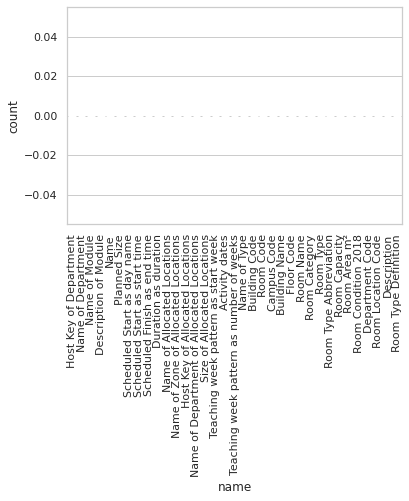

Host Key of Department - 0.0%
Name of Department - 0.0%
Name of Module - 0.0%
Description of Module - 0.0%
Name - 0.0%
Planned Size - 0.0%
Scheduled Start as day name - 0.0%
Scheduled Start as start time - 0.0%
Scheduled Finish as end time - 0.0%
Duration as duration - 0.0%
Name of Allocated Locations - 0.0%
Name of Zone of Allocated Locations - 0.0%
Host Key of Allocated Locations - 0.0%
Name of Department of Allocated Locations - 0.0%
Size of Allocated Locations - 0.0%
Teaching week pattern as start week - 0.0%
Activity dates - 0.0%
Teaching week pattern as number of weeks - 0.0%
Name of Type - 0.0%
Building Code - 0.0%
Room Code - 0.0%
Campus Code - 0.0%
Building Name - 0.0%
Floor Code - 0.0%
Room Name - 0.0%
Room Category - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Room Capacity - 0.0%
Room Area m² - 0.0%
Room Condition 2018 - 0.0%
Department Code - 0.0%
Room Location Code - 0.0%
Description - 0.0%
Room Type Definition - 0.0%


In [34]:
plotdata(merged_timetable_df_clean)